---

# *Cleaning And Analyzing Employee Exit Surveys*

---

**Dataset Description :** In this project we are working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here.](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

**Attribute Description :**
- For *' dete_survey '* :
    |Row|Description|
    |---|-----------|
    |`ID`| An id used to identify the participant of the survey|
    |`SeparationType`| The reason why the person's employment ended|
    |`Cease Date`| The year or month the person's employment ended|
    |`DETE Start Date`| The year the person began employment with the DETE|

- For *' tafe_survey '* :
    |Row|Description|
    |---|-----------|
    |`Record ID`| An id used to identify the participant of the survey|
    |`Reason for ceasing employment`| The reason why the person's employment ended|
    |`LengthofServiceOverall. Overall Length of Service at Institute (in years)`| The length of the person's employment (in years)|


---

## AIM :
To answer the following:
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
    
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

---

## Preliminary Data Exploration:
Before actually working and modifying the dataset let's explore the basic datasets to draw some preliminary inferences from the data.

In [1]:
# importing the required libraries and the dataset into a dataframe:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
# let's first explore 'dete_survey':
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
# let's explore some rows for further info:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [6]:
dete_survey['SeparationType'].isnull().sum()

0

**Observations:**
- The column headers are irregular so we should make them uniform them for better data manipulation.
- For our relevance, we should concentrate on columns related to `SeparationType`. Using *value_counts* method we see the major reasons for Job-separation.Overall, there are no null values in the column.
- There are some colunms like `Aboriginal`,`Torres Strait`,`South Sea`,`Disability` and `NESB`, which have have null objects that we should explore as we dive deeper in the analysis.
- The dataset contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.

In [7]:
# let's explore 'tafe_survey' :
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [8]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

**Observations:**
- The column headers are excessively long, which makes the dataset harder to manipulate, hence we should change them to something much more concise.
- There are columns with null values like `LengthofServiceCurrent`, etc. that we need to address before diving deeper into our analysis.

---

## Data Cleaning:

In [10]:
# in order to include the 'Not Stated' values as NaN:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


We see that the 'Not Stated' values have now been converted to 'NaN' values in the dataset.

In [11]:
# dropping columns that are not required for our analysis in dete_survey:
dete_survey.columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [12]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [13]:
# dropping the columns that we don't need in tafe_survey:
tafe_survey.columns[17:66]

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

In [14]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

We see that there are several columns with similar data but different column headers.Below are some of the columns we'd like to use for our final analysis:

|dete_survey|tafe_survey|Definition|
|-----------|-----------|----------|
|`ID`|`Record ID` |An id used to identify the participant of the survey|
|`SeparationType`|`Reason for ceasing employment`|The reason why the person's employment ended|
|`Cease Date`|`CESSATION YEAR`|The year or month the person's employment ended|
|`DETE Start Date`|` `| The year the person began employment with the DETE|
|` `|`LengthofServiceOverall.Overall Length of Service at Institute(in years)`|The length of the person's employment(in years)|
|`Age`|`CurrentAge.Current Age`| The year the person began employment with the DETE|
|`Gender`|`	Gender.What is your Gender?`| The year the person began employment with the DETE|


**Let's make the headers uniform which would help us merge the datasets together and help with grouping similar data together.** 

In [15]:
# let's cleanup the column headers in our datasets:

## starting with dete_survey_updated:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [16]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [17]:
## modifying the column headers of tafe_survey_updated:
new_names = ({'Record ID': 'id','CESSATION YEAR': 'cease_date','Reason for ceasing employment': 'separationtype',
           'Gender. What is your Gender?': 'gender','CurrentAge. Current Age': 'age',
           'Employment Type. Employment Type': 'employment_status',
           'Classification. Classification': 'position',
           'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
           'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

tafe_survey_updated = tafe_survey_updated.rename(new_names, axis=1)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In order to get the answer for our questions, we need to focus on the ***'separationtype'*** column of our dataset.
- We need to analyse job-separation due to ***'Resignation'*** to better get to the answer.

In [18]:
# for dete_survey:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In dete_survey we see mainly see 3 main resignantion types:
- `Resignation-Other reasons`
- `Resignation-Other employer`
- `Resignation-Move overseas/interstate`

In [19]:
# Let's create a dataframe only for 'resignation' in dete_survey_upated:
pattern = r"[Rr]esignation"
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains(pattern)].copy()
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [20]:
# for tafe_survey:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [21]:
## let's create a dataframe only for resignation in tafe_survey_updated:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']== 'Resignation']
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


**Now that we have seperated the data for resignantion values from both the dataframes, let's check for inconsistencies in our data that can potentially throw off our inferences.**

In [22]:
# logical inconsistencies in 'cease_date' in 'dete_resignantions':
dete_resignations['cease_date'].value_counts() # to get all the unique values in the column 

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
09/2010      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

Since we see that the `cease_date` column has inconsistent data entries, let's extract all the years from the column:

In [23]:
# we need to extract the 'yyyy' pattern from the column values:
pattern = r"(?P<Year>[0-9]{4})"

# extracting the pattern from the column values:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern).astype(float)

In [24]:
# checking our corrections:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [25]:
## checking for logical inconsistencies in the cease_date column in 'tafe_survey':
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [26]:
# Let's now check the start date in the columns:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

### Once all the values have been cleansed and sorted, we see that:
- The earliest start date for employment in the *`dete`* dataset is from *'1963'*.
- The earliest resignation dates start from the year *'2006'* in the *`dete`* dataset and *'2009'* in the *`tafe`* dataset, hence both the datasets don't span through the same number of years.
- Since there are no start start dates before *'1940'* and end dates after *'2006-09'* we can logically validate that **the dataset is viable for our current analysis.**

Since our question mainly concerns about the years of service that the employee provided, we should look for attributes that can aid our analysis.
- *`tafe_resignations`* dataframe already contains a `service` column, which we renamed to `institute_service`. In order to analyze both surveys together, we'll have to create a corresponding `institute_service` column in *`dete_resignations`*.

In [27]:
# let's create a 'institute_service' column in 'dete_resignation':
dete_resignations['institute_service'] = dete_resignations['cease_date']- dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

Now that we have the 'numerical' values of the length of the employment for the employees that resigned, we need to relate those values to 'Dissatisfaction' factors for quitting the job.


Let's identify all the factors in the two datasets that portay **'dissatisfaction'** with the jobs.

- For **'tafe_survey_updated'** :
    - `Contributing Factors. Dissatisfaction`
    - `Contributing Factors. Job Dissatisfaction`
    
- For **'dete_survey_updated'**:
    - `job_dissatisfaction`
    - `dissatisfaction_with_the_department`
    - `physical_work_environment`
    - `lack_of_recognition`
    - `lack_of_job_security`
    - `work_location`
    - `employment_conditions`
    - `work_life_balance`
    - `workload`
    
If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column.

In [28]:
# First, let's tackle the 'tafe_survey' dataset:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Both the columns contain:
- ' - ' values that indicate **'False'**
- *'Contributing Factors. Dissatisfaction'* or *'Contributing Factors. Job Dissatisfaction'* that indicate **'True'**
- Empty values indicating **'NaN'**

We need to actually convert these values into ***True, False, or NaN values.***

In [30]:
# creating a function that converts the values in the columns:
def update_vals(value):
    return_val = 0;
    if pd.isnull(value):
        return_val = np.nan;
    elif (value == '-'):
        return_val = False;
    else:
        return_val = True;
    return return_val

## checking the function:

print(update_vals('NaN'))
        

True


In [31]:
# creating a new column to store our required values after applying the function in the dataframe:
req_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

In [32]:
tafe_resignations_up = tafe_resignations.copy() #to avoid'settingwithcopy' error

tafe_resignations_up['dissatisfied'] = tafe_resignations[req_cols].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [33]:
# Let's now check the 'dete_survey' dataset:
dete_resignations['job_dissatisfaction'].value_counts(dropna=False)

False    270
True      41
Name: job_dissatisfaction, dtype: int64

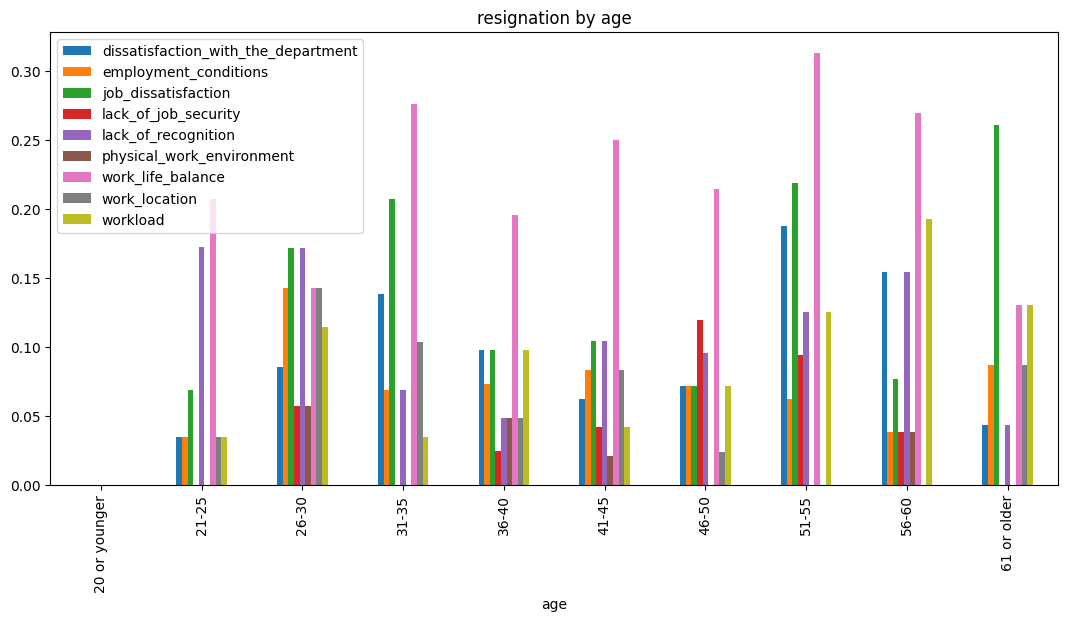

In [34]:
# creating a new column to store our required values in the dataframe:
req_cols = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition'
            ,'lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']

# Let's see if we can identify the most popular reason for quitting:
pv_req = pd.pivot_table(dete_resignations, index='age', values=req_cols)
pv_req.plot(kind='bar', title= 'resignation by age', figsize=(13,6))

In [35]:
dete_resignations_up = dete_resignations.copy() # to avoid 'settingwithcopy' error

dete_resignations_up['dissatisfied'] = dete_resignations_up[req_cols].any(axis=1, skipna=False)
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

We have now assimilated the ' dissatisfaction ' values for all the employees who resigned from both the datasets. Since we have all the required values, we can now combine the datasets for final dataset manipulation which will help us answer our required questions.

**Our end goal is to aggregate the data according to the `institute_service` column to correlate with the `dissatisfied` column.**

In [36]:
# For better identification of our datasets let's add an identity column `institute`:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

---

## Final Dataset Analysis:

Now that we have cleaned the datasets, we can combine them, which will make our final analysis procedure concise and easier.

In [37]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# let's get some info about our combined dataset:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

In [39]:
# let's find all the null values:
combined.isnull().sum()

id                                                       0
separationtype                                           0
cease_date                                              16
dete_start_date                                        368
role_start_date                                        380
position                                                53
classification                                         490
region                                                 386
business_unit                                          619
employment_status                                       54
career_move_to_public_sector                           340
career_move_to_private_sector                          340
interpersonal_conflicts                                340
job_dissatisfaction                                    340
dissatisfaction_with_the_department                    340
physical_work_environment                              340
lack_of_recognition                                    3

In [40]:
# let's drop columns with less than 500 non-null values:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [41]:
combined_updated.isnull().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          8
institute             0
dtype: int64

In [42]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


In [43]:
# let's inspect the `institute_service` column:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


We see that this column contains values in different forms. In order to sort this column, we should convert the values in categories as **[this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage)** states ***understanding employee's needs according to career stage instead of age is more effective.***

Let's categorize the values in the `institute_service` column using :
- **New:** Less than 3 years at a company
- **Experienced:** 3-6 years at a company
- **Established:**7-10 years at a company
- **Veteran:** 11 or more years at a company

In [44]:
combined_updated['institute_service'].astype(str)

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
       ... 
646     5-6
647     1-2
648     nan
649     5-6
650     3-4
Name: institute_service, Length: 651, dtype: object

Since our first category includes 'Less than 3 years at a company' we can convert 'Less than 1 year' to 'New' and 'More than 20 years' to 'Veteran' which includes '11 or more years at a company'.

In [45]:
# let's create a function to sort range values:
def range_value(value):
    values = str(value)
    if '-' in values:
        values = values.split('-')
        values = (float(values[1]) + float(values[0])) / 2
        return str(values)
    elif (value == 'Less than 1 year'):
        return ('1.0')
    elif (value == 'More than 20 years'):
        return ('20.0')
    else:
        return str(value)

# checking the function:
range_value('20.0')

'20.0'

In [46]:
# applying the funtion to our required column:
combined_updated['institute_service']= combined_updated[['institute_service']].applymap(range_value)
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

In [47]:
# let's create a function to sort the values in the selected ranges:
def convert_range(val):
    if pd.isnull(val):
        return 'Unknown'
    elif (val < 3.0):
        return 'New';
    elif (val > 3.0) and (val < 6.0):
        return 'Experienced';
    elif (val > 6.0) and (val < 10.0): 
        return 'Established';
    elif (val > 10.0):
        return 'Veteran';
    else :
        return 'Unknown'  # to cover for unknown cases

# checking the function:
convert_range(20.0)

'Veteran'

In [48]:
# applying the function to our column :
combined_updated['service_cat'] = combined_updated[['institute_service']].applymap(convert_range)
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Veteran        136
Experienced    135
Unknown        131
Established     56
Name: service_cat, dtype: int64

Finally, let's start with the aggregation process which would lead us to the answer of our questions.

In [49]:
# Let's check the dissatisfied column:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [50]:
# Let's fill the 'NaN' values with the most occuring values in the group:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [51]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [52]:
# let's create a pivot table to aggregate the 'service_cat' column:
pv_combined_updated = pd.pivot_table(combined_updated, index='service_cat', values='dissatisfied')
pv_combined_updated['dissatisfied'].sort_values(ascending=False)

service_cat
Established    0.553571
Veteran        0.485294
Unknown        0.343511
Experienced    0.303704
New            0.295337
Name: dissatisfied, dtype: float64

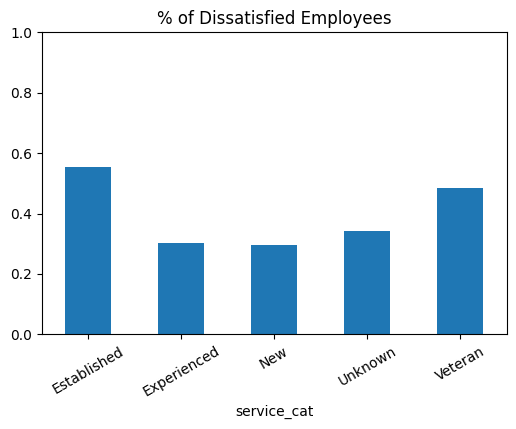

In [53]:
# plotting the pivot table:
pv_combined_updated.plot(kind ='bar', ylim=(0,1), title = '% of Dissatisfied Employees', legend=False, rot=30)

## Observations :
- The **Established** *(7-10 years at a company)* category has the highest number of resignantions, closely followed by the **Veteran** *( 11 or more years at a company)* category.
- We see that the **employees are higly dissatisfied**, especially as their years of employment increase.

---

Let's try to correlate our findings with the different age groups in the dataset:

In [54]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [55]:
## Let's clean the column:
def clean_up(value):
    if value== 'nan':
        return 'Unknown'
    elif value == '20 or younger':
        return value
    elif value == '61 or older':
        return value
    return (value[:2] + '-' + value[-2:])

clean_up('nan')

'Unknown'

In [56]:
combined_updated['age'] = combined_updated['age'].astype(str).str.replace('56 or older', '56-60').apply(clean_up)

combined_updated['age'].value_counts().sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56-60            55
61 or older      23
Unknown          55
Name: age, dtype: int64

In [57]:
# let's create a pivot table to plot the dissatisfaction values:
pv_age = pd.pivot_table(combined_updated, index='age', values='dissatisfied')

pv_age

,dissatisfied
age,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56-60,0.381818


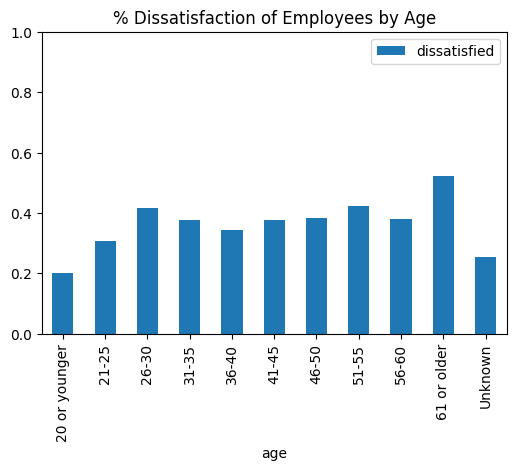

In [58]:
# let's plot the age values:
pv_age.plot(kind ='bar', ylim = (0,1), title = '% Dissatisfaction of Employees by Age')

## Observation : 

- People over the age of 61 have the highest dissatisfaction amongst the employees (over 52.1%).
- Middle age groups have dissatisfaction values (~ 40%).
- Younger age groups (<25) have very low dissatisfaction values.

---

Let's compare the dissatisfaction values accross the datasets:

In [59]:
## creating a pivot table to aggregate the values by service category (i.e years of service):
pv_dete_tafe_service = pd.pivot_table(combined_updated, index='service_cat', columns='institute', values='dissatisfied', margins=True)
pv_dete_tafe_service

institute,DETE,TAFE,All
service_cat,,,
Established,0.685714,0.333333,0.553571
Experienced,0.435897,0.250000,0.303704
New,0.375000,0.262774,0.295337
Unknown,0.382716,0.280000,0.343511
Veteran,0.560000,0.277778,0.485294
All,0.479100,0.267647,0.368664


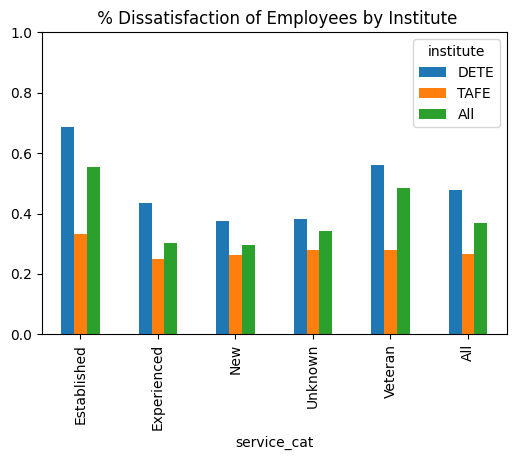

In [60]:
# plotting the pivot table:
pv_dete_tafe_service.plot(kind ='bar', ylim = (0,1), title = ' % Dissatisfaction of Employees by Institute')

In [61]:
## creating a pivot table to aggregate the values by age (i.e years of service):
pv_dete_tafe_age = pd.pivot_table(combined_updated, index='age', columns='institute', values='dissatisfied', margins=True)
pv_dete_tafe_age['Difference'] = pv_dete_tafe_age['DETE'] - pv_dete_tafe_age['TAFE']
pv_dete_tafe_age

institute,DETE,TAFE,All,Difference
age,,,,
20 or younger,0.000000,0.222222,0.200000,-0.222222
21-25,0.310345,0.303030,0.306452,0.007315
26-30,0.571429,0.250000,0.417910,0.321429
31-35,0.551724,0.218750,0.377049,0.332974
36-40,0.390244,0.281250,0.342466,0.108994
41-45,0.479167,0.266667,0.376344,0.212500
46-50,0.452381,0.307692,0.382716,0.144689
51-55,0.593750,0.282051,0.422535,0.311699
56-60,0.576923,0.206897,0.381818,0.370027


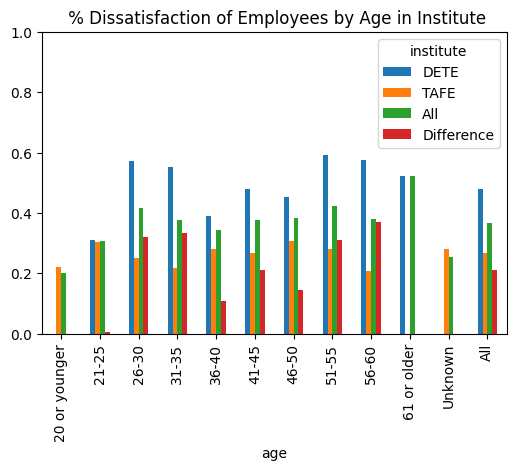

In [62]:
## let's plot the pivot table:
pv_dete_tafe_age.plot(kind ='bar', ylim = (0,1), title = ' % Dissatisfaction of Employees by Age in Institute')

---

# Conclusion:

Let's now try to answer the questions that we asked before our analysis:

1. **Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**
    - On average, about 30% employees who worked for shorter period of time (i.e `New` and `Experienced` categories) had less dissatisfaction.
    - As the experience in the company increased, so did the number of dissatisfied employees (~51% of the employees in `Established` and `Veteran`categories were dissatisfied.)
    - Institute wise, **`TAFE`** has lesser dissatified employees ( ~26% ) when compared to **`DETE`**, which has over ( ~48% ) dissatisfied employees.

    
2. **Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**
    - On average less `younger` employees (age < 25) resign due to dissatisfaction ( ~25% ).
    - As the age of the employee increases, so does the chance of him resigning due to dissatisfaction, especially for the eldest age group (i.e  `51 and older`) which have over ( ~45% ) resignings due to dissatisfaction.
    - Institute wise, **`TAFE`** has lesser dissatified employees in every age group when compared to **`DETE`**, with an average difference of ( ~21% ).
    - **`TAFE`** has almost no dissatifed employees belonging to the `younger` age group.